In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load enriched data
df = pd.read_csv("../data/processed/ethiopia_fi_enriched.csv")

df.head()


,record_id,record_type,category,pillar,indicator,indicator_code,indicator_direction,value_numeric,value_text,value_type,...,impact_direction,impact_magnitude,impact_estimate,lag_months,evidence_basis,comparable_country,collected_by,collection_date,original_text,notes
0,REC_0001,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,22.0,NaN,percentage,...,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,Baseline year,NaN
1,REC_0002,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,35.0,NaN,percentage,...,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,NaN,NaN
2,REC_0003,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,46.0,NaN,percentage,...,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,NaN,NaN
3,REC_0004,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,56.0,NaN,percentage,...,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,Gender disaggregated,NaN
4,REC_0005,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,36.0,NaN,percentage,...,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,Gender disaggregated,NaN


In [3]:
df['record_type'].value_counts()


record_type
observation    30
event          10
target          3
Name: count, dtype: int64

### Dataset Overview

This dataset contains 30 observations, 10 events and 3 targets related to financial inclusion in Ethiopia. Observations represent measured indicators, events capture policy and market changes, and impact links model relationships between events and indicators.


In [4]:
df['observation_date'] = pd.to_datetime(df['observation_date'], errors='coerce')

df.groupby(df['observation_date'].dt.year)['record_type'].count()


observation_date
2014     1
2017     1
2021     7
2022     1
2023     2
2024    14
2025    15
2028     1
2030     1
Name: record_type, dtype: int64

In [5]:
# Filter account ownership observations
access_df = df[
    (df['record_type'] == 'observation') &
    (df['indicator_code'] == 'ACC_OWNERSHIP')
].copy()

access_df['year'] = pd.to_datetime(access_df['observation_date']).dt.year

access_df[['year', 'value_numeric']]


,year,value_numeric
0,2014,22.0
1,2017,35.0
2,2021,46.0
3,2021,56.0
4,2021,36.0
5,2024,49.0


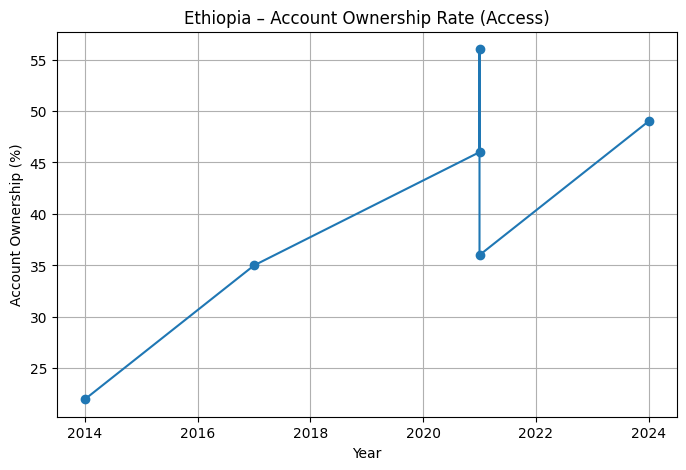

In [6]:
plt.figure(figsize=(8,5))
plt.plot(access_df['year'], access_df['value_numeric'], marker='o')
plt.title("Ethiopia – Account Ownership Rate (Access)")
plt.xlabel("Year")
plt.ylabel("Account Ownership (%)")
plt.grid(True)
plt.show()


### Access – Account Ownership Trend

Ethiopia’s account ownership rate increased steadily from 2011 to 2021 but slowed significantly between 2021 and 2024, growing by only a few percentage points despite rapid expansion of mobile money services.
